In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64
import json

In [14]:
data_dir = "dataset/sample4"
filenames = sorted(os.listdir(data_dir))
filenames

['WIN_20230915_13_43_50_Pro.jpg',
 'WIN_20230915_13_43_54_Pro.jpg',
 'WIN_20230915_13_43_58_Pro.jpg',
 'WIN_20230915_13_44_01_Pro.jpg',
 'WIN_20230915_13_44_06_Pro.jpg',
 'WIN_20230915_13_44_09_Pro.jpg',
 'WIN_20230915_13_44_13_Pro.jpg',
 'WIN_20230915_13_44_16_Pro.jpg',
 'WIN_20230915_13_44_20_Pro.jpg',
 'WIN_20230915_13_44_24_Pro.jpg',
 'WIN_20230915_13_44_29_Pro.jpg']

In [4]:
def find_first_one(arr):
    for i, value in enumerate(arr):
        if value==1:
            return i
    return -1

In [6]:
def find_bbox_coordinates(img_sub):

    horizontal_values = img_sub.sum(axis=0)
    horizontal_values[horizontal_values>0]=1

    vertical_values = img_sub.sum(axis=1)
    vertical_values[vertical_values>0]=1

    left = find_first_one(horizontal_values)
    right = horizontal_values.shape[0]-find_first_one(np.flip(horizontal_values))
    top = find_first_one(vertical_values)
    bottom = vertical_values.shape[0]-find_first_one(np.flip(vertical_values))
    
    return left, right, top, bottom

In [39]:
def find_bbox_from_two_imgs(img_before_bgr, img_after_bgr, threshold=70, kernel_size=(5, 5), visualize=False):

    # グレースケール
    img_before_gray = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2GRAY)
    img_after_gray = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2GRAY)

    # 2値化
    ret, img_before_binary = cv2.threshold(img_before_gray, threshold, 255, cv2.THRESH_BINARY)
    ret, img_after_binary = cv2.threshold(img_after_gray, threshold, 255, cv2.THRESH_BINARY)

    # 差分
    img_sub_binary = img_after_binary - img_before_binary

    ## Opening & Closing
    # カーネル（フィルタ）を定義します
    kernel = np.ones(kernel_size, np.uint8)  # 5x5の全要素が1の行列を作成します
    # Opening処理を適用します
    img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_OPEN, kernel)
    # Closing処理を適用します
    img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_CLOSE, kernel)

    left, right, top, bottom = find_bbox_coordinates(img_sub_binary)

    if visualize:
        cv2.rectangle(img_before_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)
        cv2.rectangle(img_after_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

        img_before_rgb = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2RGB)
        img_after_rgb = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(30, 10))

        plt.subplot(2,3,1)
        plt.imshow(img_before_rgb)
        plt.title("img_before_rgb")

        plt.subplot(2,3,2)
        plt.imshow(img_after_rgb)
        plt.title("img_after_rgb")

        plt.subplot(2,3,4)
        plt.imshow(img_before_binary, cmap="gray")
        plt.title("img_before_binary")

        plt.subplot(2,3,5)
        plt.imshow(img_after_binary, cmap="gray")
        plt.title("img_after_binary")

        plt.subplot(2,3,6)
        plt.imshow(img_sub_binary, cmap="gray")
        plt.title("img_sub_binary")
        
        plt.tight_layout()
    
    return left, right, top, bottom

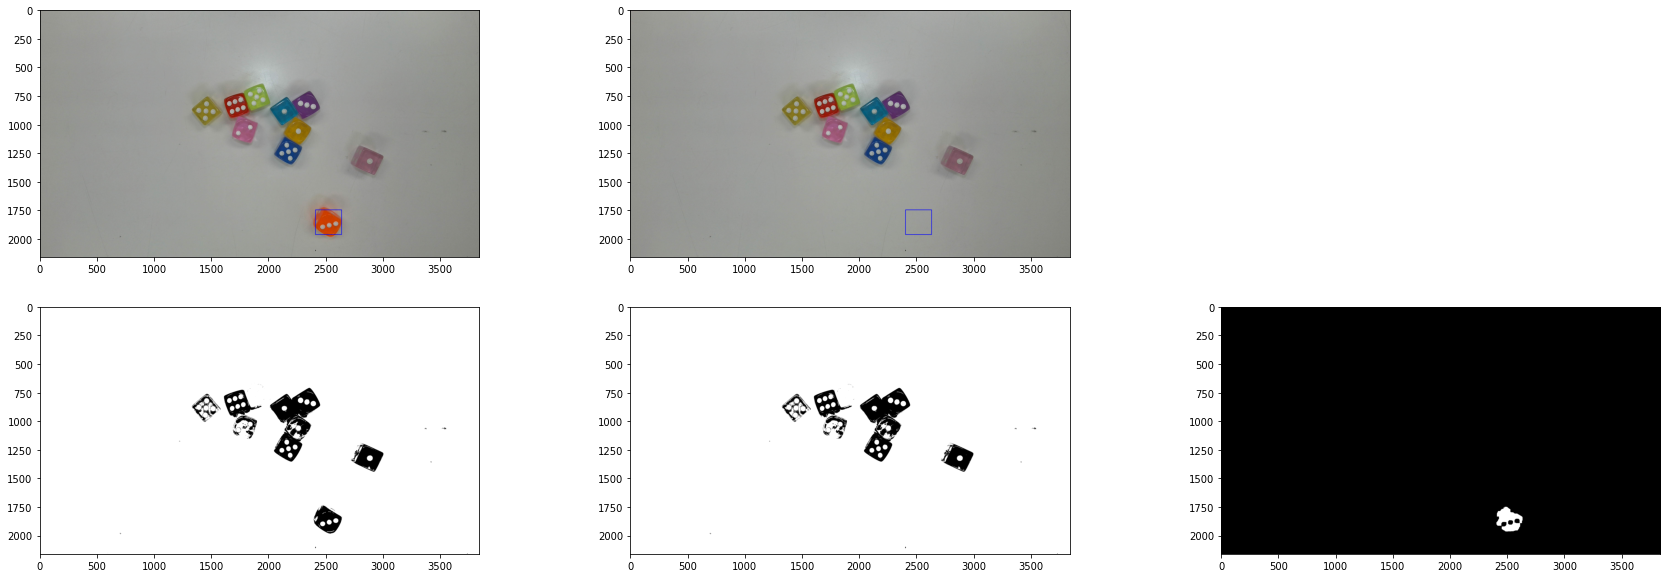

In [22]:
idx = 0
img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))

# グレースケール化
img_before_gray = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2GRAY)
img_after_gray = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2GRAY)

# 2値化
threshold = 110
ret, img_before_binary = cv2.threshold(img_before_gray, threshold, 255, cv2.THRESH_BINARY)
ret, img_after_binary = cv2.threshold(img_after_gray, threshold, 255, cv2.THRESH_BINARY)

# 差分
img_sub_binary = img_after_binary - img_before_binary

## Opening & Closing
# カーネル（フィルタ）を定義します
kernel_size = (20, 20)  # カーネルのサイズを設定します
kernel = np.ones(kernel_size, np.uint8)  # 5x5の全要素が1の行列を作成します
# Opening処理を適用します
img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_OPEN, kernel)
# Closing処理を適用します
img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_CLOSE, kernel)

left, right, top, bottom = find_bbox_coordinates(img_sub_binary)

cv2.rectangle(img_before_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)
cv2.rectangle(img_after_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_before_rgb = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2RGB)
img_after_rgb = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 10))

plt.subplot(2,3,1)
plt.imshow(img_before_rgb)

plt.subplot(2,3,2)
plt.imshow(img_after_rgb)

plt.subplot(2,3,4)
plt.imshow(img_before_binary, cmap="gray")

plt.subplot(2,3,5)
plt.imshow(img_after_binary, cmap="gray")

plt.subplot(2,3,6)
plt.imshow(img_sub_binary, cmap="gray")

In [40]:
data_dir = "dataset/sample5"
filenames = sorted(os.listdir(data_dir))
filenames

['WIN_20230915_13_51_02_Pro.jpg',
 'WIN_20230915_13_51_09_Pro.jpg',
 'WIN_20230915_13_51_12_Pro.jpg',
 'WIN_20230915_13_51_17_Pro.jpg',
 'WIN_20230915_13_51_20_Pro.jpg',
 'WIN_20230915_13_51_24_Pro.jpg',
 'WIN_20230915_13_51_27_Pro.jpg',
 'WIN_20230915_13_51_31_Pro.jpg',
 'WIN_20230915_13_51_36_Pro.jpg',
 'WIN_20230915_13_51_40_Pro.jpg',
 'WIN_20230915_13_51_44_Pro.jpg']

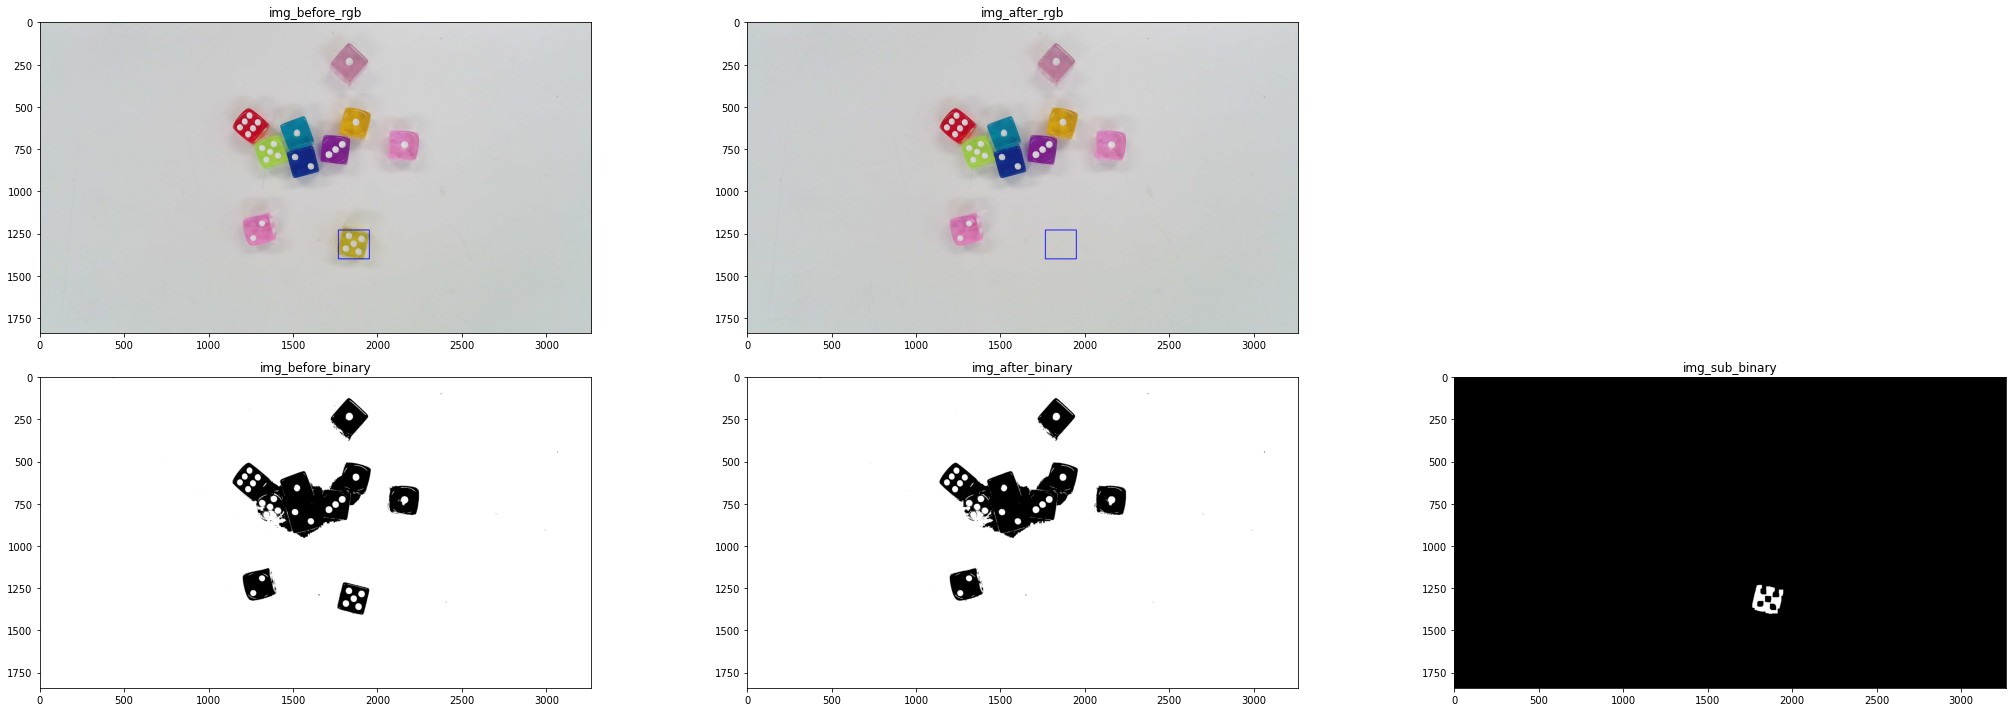

In [46]:
## 二枚の画像から1つのbboxを検出
idx = 1
img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))
bbox = find_bbox_from_two_imgs(img_before_bgr, img_after_bgr, threshold=170, kernel_size=(20,20), visualize=True)

(2051, 2277, 1102, 1320)
(1764, 1947, 1230, 1401)
(1202, 1386, 1138, 1319)
(1302, 2243, 648, 814)
(1143, 1426, 513, 895)
(1727, 1935, 140, 338)
(1293, 1957, 511, 898)
(1618, 1836, 650, 900)
(1330, 1489, 674, 918)
(1427, 1620, 566, 762)


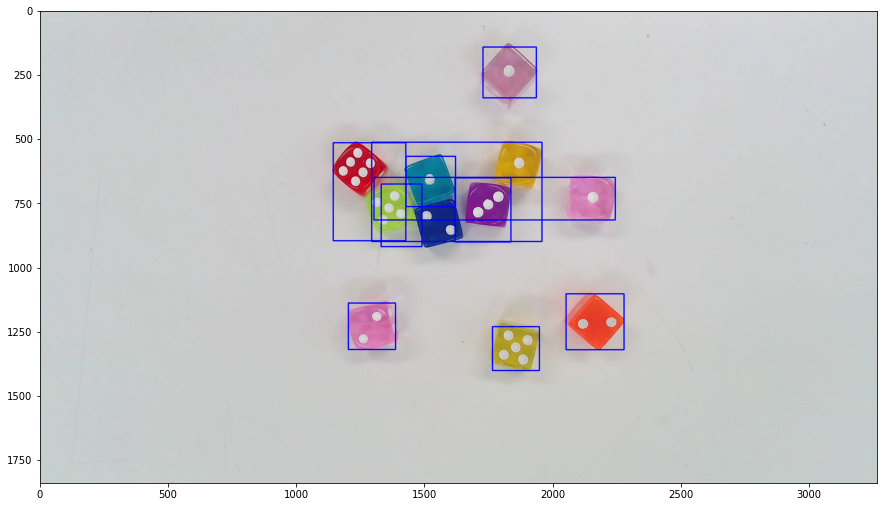

In [47]:
## フォルダ内の全ての画像からbboxを検出
bboxes = []

for idx in range(len(filenames)-1):
    img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
    img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))
    
    bbox = find_bbox_from_two_imgs(img_before_bgr, img_after_bgr,
                                threshold=170,
                                kernel_size=(20,20),
                                visualize=False)
    print(bbox)
    bboxes.append(bbox)
    
## 最初の画像にbboxを描画

img_original_bgr = cv2.imread(os.path.join(data_dir, filenames[0]))

for bbox in bboxes:
    left, right, top, bottom = bbox
    cv2.rectangle(img_original_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_original_rgb = cv2.cvtColor(img_original_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_original_rgb)
    
    

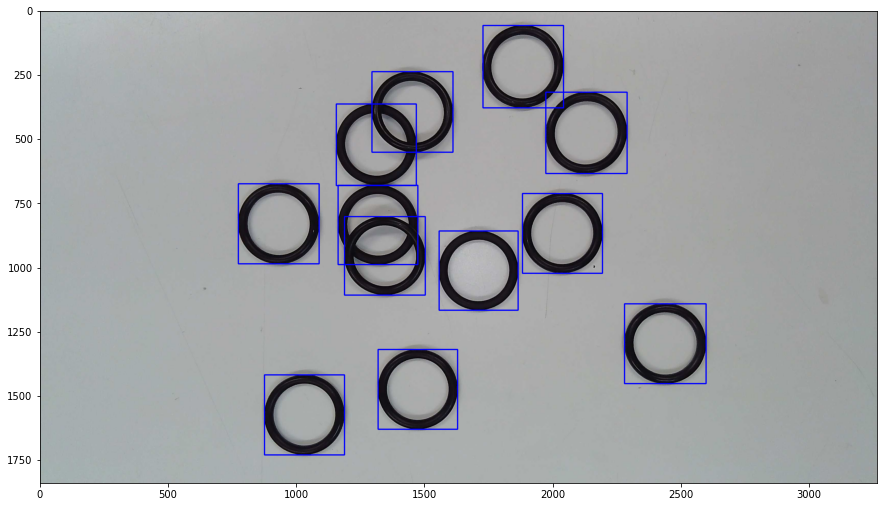

In [162]:
## 最初の画像に全てのbboxを描画

img_original_bgr = cv2.imread(os.path.join(data_dir, filenames[0]))

for bbox in bboxes:
    left, right, top, bottom = bbox
    cv2.rectangle(img_original_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_original_rgb = cv2.cvtColor(img_original_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_original_rgb)
    

In [164]:
# labelme objectのshapeを作る関数
def generate_labelme_object_shape(label, bbox):
    left, right, top, bottom = bbox
    return {
        "label": label,
        "points": [[left, top], [right, bottom]],
        "group_id": None,
        "description": "",
        "shape_type": "rectangle",
        "flags": {}
    }


In [165]:
# 全てのbboxに対してshapeを作成しリスト化する関数

def generate_shapes_from_bboxes(label, bboxes):
    shapes = []
    for bbox in bboxes:
        shape = generate_labelme_object_shape(label, bbox)
        shapes.append(shape)
    
    return shapes

shapes = generate_shapes_from_bboxes(label="o-ring", bboxes=bboxes)

In [153]:
filename = filenames[0]

# jsonファイル名を作成
filename_body = os.path.splitext(filename)[0]
json_filepath = filename_body+".json"

# 画像を読み込みサイズを取得
img_filepath = os.path.join(data_dir, filename) # 元の画像
img_original_bgr = cv2.imread(img_filepath)
height, width, depth = img_original_bgr.shape

# 画像をbase64にエンコード
_, encoded = cv2.imencode(".jpg", img_original_bgr)
img_base64 = base64.b64encode(encoded).decode("ascii")

# json形式のlabelmeアノテーションデータを作成
annotation_dict = {
    "version": "5.2.0.post4",
    "flags": {},
    "shapes": shapes,
    "imagePath": filename,
    "imageData": img_base64,
    "imageHeight":height,
    "imageWidth": width
    }

# アノテーションデータを保存
with open(json_filepath, "w") as json_file:
    json.dump(annotation_dict, json_file)

{'version': '5.2.0.post4',
 'flags': {},
 'shapes': [{'label': 'o-ring',
   'points': [[2279, 1141], [2597, 1452]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   'points': [[1318, 1319], [1628, 1630]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   'points': [[1881, 711], [2193, 1022]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   'points': [[1972, 316], [2289, 633]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   'points': [[1727, 56], [2041, 377]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   'points': [[875, 1418], [1187, 1730]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'o-ring',
   '